<a href="https://colab.research.google.com/github/oscarnavmac/Proyecto-Final-de-Redes-Convolucionales/blob/main/CNN_for_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
num_epochs = 10
batch_size = 4
learning_rate = 0.001

In [4]:
# this dataset has PILImage images of range [0,1].
# We transform them to Tensors of normalized range [-1, 1]

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                           shuffle=False)

# Hard-coded classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 43598418.04it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


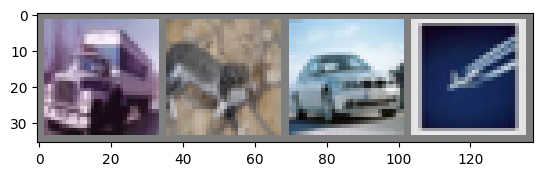

In [5]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels =  next(dataiter)

imshow(torchvision.utils.make_grid(images))

In [6]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x # return logits

In [7]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape = [4, 3, 32, 32] = 4, 3, 1024
        # input_layer = 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}%')

print('Finished Training')

Epoch [1/10], Step [2000/12500], Loss: 2.3417%
Epoch [1/10], Step [4000/12500], Loss: 2.2273%
Epoch [1/10], Step [6000/12500], Loss: 2.2509%
Epoch [1/10], Step [8000/12500], Loss: 2.3340%
Epoch [1/10], Step [10000/12500], Loss: 1.6116%
Epoch [1/10], Step [12000/12500], Loss: 1.9163%
Epoch [2/10], Step [2000/12500], Loss: 2.2104%
Epoch [2/10], Step [4000/12500], Loss: 2.5718%
Epoch [2/10], Step [6000/12500], Loss: 1.9331%
Epoch [2/10], Step [8000/12500], Loss: 1.9879%
Epoch [2/10], Step [10000/12500], Loss: 1.7769%
Epoch [2/10], Step [12000/12500], Loss: 1.8733%
Epoch [3/10], Step [2000/12500], Loss: 1.8540%
Epoch [3/10], Step [4000/12500], Loss: 0.8933%
Epoch [3/10], Step [6000/12500], Loss: 1.4384%
Epoch [3/10], Step [8000/12500], Loss: 0.9237%
Epoch [3/10], Step [10000/12500], Loss: 1.0251%
Epoch [3/10], Step [12000/12500], Loss: 2.4772%
Epoch [4/10], Step [2000/12500], Loss: 1.3191%
Epoch [4/10], Step [4000/12500], Loss: 1.6497%
Epoch [4/10], Step [6000/12500], Loss: 1.7442%
Epoch [

In [8]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value, index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted==labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label==pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 56.97 %
Accuracy of plane: 58.8 %
Accuracy of car: 73.0 %
Accuracy of bird: 50.2 %
Accuracy of cat: 48.2 %
Accuracy of deer: 43.1 %
Accuracy of dog: 48.7 %
Accuracy of frog: 65.3 %
Accuracy of horse: 60.6 %
Accuracy of ship: 71.6 %
Accuracy of truck: 50.2 %
